# Basic supervised machine learning methods: classification

Classification methods are used when the target (dependent) variable is categorical, and the goal is to assign each data point to a specific category. Here the explanatory variables (independent) can be either categorical or continous. Hence, the amount of classification algorithms is very long.

Classification algorithms, unlike regressions, use evaluation metrics that are based on the amount of correct predictions of the model based on the known labels (true values). This is usually expressed as a **confusion matrix**, a table with four entries for a binary classification model: the **True Positives (TP)** and **True Negatives (TN)**, where the model correctly predicts one class or the other, and the **False Positives (FP)** and **False Negatives (FN)**, where the model incorrectly predicts the positive and negative class, respectively.

From these four elements of the table, several metrics could be extracted:

- **Precision** is the ratio of correctly predicted positive observations to the total predicted positives. It is a measure of the accuracy of positive predictions.

- **Specificity** is the ratio of correctly predicted negative observations to the total actual negatives. It is a measure of the accuracy of negative predictions.

- **Sensitivity**, also known as **recall** or **true positive rate**, is the ratio of correctly predicted positive observations to the total actual positives. It measures the model's ability to correctly identify positive instances.

- **Accuracy** is the ratio of correctly predicted observations to the total observations. It provides an overall measure of the model's correctness.

- The **F1 score** is the harmonic mean of precision and sensitivity. It provides a balance between precision and sensitivity.

<!-- Add an empty line here -->

[![Classification metrics](https://miro.medium.com/v2/resize:fit:640/format:webp/1*NhPwqJdAyHWllpeHAqrL_g.png)](https://medium.com/all-about-ml/evaluation-metrics-in-classification-algorithms-79c036a131cb)

<!-- Add an empty line here -->

### Perceptron

The perceptron is one of the most basic binary classifiers, and the fundamental building block of artificial neural networks. The idea behind the perceptron is the biological neuron, where based on the different inputs collected from the dendrites it triggers/not triggers a signal on the axon to the next neuron:

<!-- Add an empty line here -->

![Neuron](images/Neurons.png)

<!-- Add an empty line here -->

Analogously, the perceptron takes as input one or a vector of continous independent variables and their weights, which is summed up and passes the result through a **binary step or unit step function** to produce a binary output $\hat{y}$:

$$\hat{y} = \begin{cases} 1 & \text{if } w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n > 0 \\ 0 & \text{otherwise}
\end{cases}$$

where:
- $\hat{y}$ is the predicted output.
- $w_0, w_1, w_2, ..., w_n$ are the weights associated with the inputs.
- $x_1, x_2, ..., x_n$ are the input features.

As we will review in the next session while discussing advanced supervised methods there are multiple **activation functions** besides the binary step function that can be used. At any rate, the Perceptrons are trained (learn from the data) by adjusting its weights based on the error in its predictions: 

<!-- Add an empty line here -->

![Perceptron scheme](images/Perceptron.png)

<!-- Add an empty line here -->

To understand the perceptron, we need to understand a concept that is key also for training neural networks: the **learning rule**: the specific mathematical algorithm used to update the model's parameters, the weights, based on the input data and the error produced by the current prediction.

For the perceptron, the updated weight $w^\prime_i$ is computed iteratively during the training process until convergence is achieved as follows:

$$w^\prime_i \leftarrow w_i + \alpha \cdot (y - \hat{y}) \cdot x_i$$

where:
- $w_i$ is the weight associated with the $i$-th input feature.
- $\alpha$ is the learning rate, a small positive constant of range [0, 1] that determines the step size in weight updates.
- $y$ is the true label (the actual class of the instance).
- $\hat{y}$ is the predicted output of the perceptron.
- $x_i$ is the $i$-th input feature.

Hence, the **learning rule** of the perceptron essentially adjusts the weights to reduce the difference between the predicted output ($\hat{y}$) and the true label ($y$), where the term $(y - \hat{y})$ represents the error of prediction at iteration $i$-th. With this, the weights are updated in the direction that minimizes this error at a **learning rate** $\alpha$. 

$\alpha$ is a constant is defined as an hyperparameter in order to maximize the search for the optimal solution: with a too small value, the algorithm will take too much time and computational resources to find the optimal solution (and also it might get stucked in local optimums) whereas a too large learning rate the algorithm might not use properly the gradient to find the optimas.

<!-- Add an empty line here -->

![Different learning rates](images/Learning_rate.png)

<!-- Add an empty line here -->

---

<!-- Add an empty line here -->

**Advantages:**
- Perceptrons are conceptually **simple** and computationally **efficient**.
- Perceptrons will **converge** to a solution if the data is linearly separable.

**Disadvantages:**
- Perceptrons are **limited to linear separability** (can only learn linear decision boundaries).
- Sensitivity to Outliers, they significantly impact perceptron performance.
- Perceptrons only produce binary outputs **without associated probabilities**. 

<!-- Add an empty line here -->

---

As a practical example, we will use the output of PCA applied to the transcriptomic profile across blood tumors. We will try to train models that are able to differentiate different histological subtypes of primary blood cancers based on the two first principal components (linear combinations of genes expression that explain most of the variability in expression).

In order to define histological subtypes, we will have to download that information from ICGC, contained in the **pcawg_specimen_histology_August2016_v9.xlsx** excel file.

In [7]:
import pandas as pd
from os import path

expression_df = pd.read_csv(path.join('data', 'gene_expression.tsv.gz'),
                                                        sep="\t", header='infer', index_col=0, compression='gzip')

sample_df = pd.read_csv(path.join('data', 'sample_df.tsv'), sep="\t", header='infer')

# ICGC database with histological subtypes
histology_df = pd.read_excel('data/pcawg_specimen_histology_August2016_v9.xlsx')
histology_df.columns = ['icgc_specimen_id'] + list(histology_df.columns[1:])
histology_df

,icgc_specimen_id,project_code,submitted_specimen_id,submitted_sample_id,tcga_specimen_uuid,icgc_sample_id,tcga_sample_uuid,donor_unique_id,icgc_donor_id,submitted_donor_id,...,tumour_histological_type,tumour_stage,tumour_grade,percentage_cellularity,level_of_cellularity,tcga_expert_re-review,tumour_histological_comment,specimen_donor_treatment_type,donor_wgs_included_excluded,specimen_library_strategy
0,SP2143,BRCA-UK,CGP_specimen_1142534,PD3851a,NaN,SA6125,NaN,BRCA-UK::CGP_donor_1114930,DO1000,CGP_donor_1114930,...,Duct micropapillary carcinoma,NaN,G2,NaN,NaN,NaN,NaN,no treatment,Included,WGS
1,SP2144,BRCA-UK,CGP_specimen_1096043,PD3890a,NaN,SA6128,NaN,BRCA-UK::CGP_donor_1069291,DO1001,CGP_donor_1069291,...,"Infiltrating duct carcinoma, NOS",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Included,WGS
2,SP2145,BRCA-UK,CGP_specimen_1142475,PD3904a,NaN,SA6131,NaN,BRCA-UK::CGP_donor_1114881,DO1002,CGP_donor_1114881,...,"Infiltrating duct carcinoma, NOS",NaN,G2,NaN,NaN,NaN,NaN,NaN,Included,WGS
3,SP2146,BRCA-UK,CGP_specimen_1142532,PD3905a,NaN,SA6134,NaN,BRCA-UK::CGP_donor_1114929,DO1003,CGP_donor_1114929,...,"Infiltrating duct carcinoma, NOS",NaN,G3,NaN,1-20%,NaN,NaN,no treatment,Included,WGS
4,SP2147,BRCA-UK,CGP_specimen_1195364,PD3945a,NaN,SA6137,NaN,BRCA-UK::CGP_donor_1167078,DO1004,CGP_donor_1167078,...,"Infiltrating duct carcinoma, NOS",NaN,G3,NaN,NaN,NaN,NaN,NaN,Included,WGS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4252,SP21193,COAD-US,TCGA-A6-2681-01A,TCGA-A6-2681-01A-01R-1410-07,0537bad8-0e85-4b05-91b3-fd965e96d0d7,SA102595,0031d433-d703-4b2c-9fdf-2920008eb457,COAD-US::7d8eab0a-e6c8-4449-9ebf-50c41db94a06,DO9788,TCGA-A6-2681,...,"Adenocarcinoma, NOS",NaN,NaN,75.0,70-75,NaN,NaN,NaN,Included,RNA-Seq
4253,SP21400,COAD-US,TCGA-AA-A00N-01A,TCGA-AA-A00N-01A-02D-A17O-10,d52f3d05-1850-473e-8e1e-ab2b4f88af2a,SA105050,6ca5c1bb-275b-4d05-948a-3c6c7d03fab9,COAD-US::e457344d-76fb-46bf-b362-61a6e811d131,DO9876,TCGA-AA-A00N,...,Mucinous adenocarcinoma,NaN,NaN,70.0,75-70,NaN,NaN,NaN,Included,WGS
4254,SP21400,COAD-US,TCGA-AA-A00N-01A,TCGA-AA-A00N-01A-02R-A00A-07,d52f3d05-1850-473e-8e1e-ab2b4f88af2a,SA105060,c3a004b4-f231-4be4-9738-2f3b6290598f,COAD-US::e457344d-76fb-46bf-b362-61a6e811d131,DO9876,TCGA-AA-A00N,...,Mucinous adenocarcinoma,NaN,NaN,70.0,75-70,NaN,NaN,NaN,Included,RNA-Seq
4255,SP21528,COAD-US,TCGA-AA-3534-01A,TCGA-AA-3534-01A-01D-1525-10,ecade2c1-9de2-4b05-b30c-4c8b81c65ae1,SA106552,66701395-5a53-41bb-866b-3bbf08bc33ab,COAD-US::df228c56-89ac-4122-93b3-6c0740c4ec09,DO9940,TCGA-AA-3534,...,"Adenocarcinoma, NOS",NaN,NaN,70.0,80-70,NaN,NaN,NaN,Included,WGS


In [8]:
tumortype_dict = dict(zip(histology_df.icgc_specimen_id, histology_df.histology_tier3))

# Get the specimensID of blood cancers
specimens_blood = sample_df[sample_df['primary_location']=='Blood']['icgc_specimen_id']

# Intersect with the available columns to find the blood cancer specimens with available expression
subset_specimens = list(set(expression_df.columns).intersection(set(specimens_blood)))

# Filter the data to do the PCA only with blood cancer specimens
blood_expression_df = expression_df[subset_specimens].copy()

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# We preprocess the data with standarization
scaler = StandardScaler()
blood_data = scaler.fit_transform(blood_expression_df.T)

# We perform the PCA
blood_pca2D = PCA(n_components=2)
blood_proj_data = blood_pca2D.fit_transform(blood_data)

# We can check the amount of variance explained by the two Principcal components
print(blood_pca2D.explained_variance_ratio_)

[0.24972332 0.0760894 ]


In [10]:
import plotly.express as px
import numpy as np

def plot_PCA_withlabels(proj_data, labels):
    
    fig = px.scatter(
        x=proj_data[:, 0], 
        y=proj_data[:, 1], 
        color=labels, 
        title='Transcriptome',
        labels={'x': 'Principal Component 1', 'y': 'Principal Component 2', 'color': 'Tumor Type'},
        width=1000, height=800
    )

    fig.update_traces(marker=dict(size=5)) 
    fig.update_layout(template='plotly_white')

    fig.show()
    
    unique_labels = np.unique(labels)
    label_mapping = {label: idx for idx, label in enumerate(unique_labels)}
    label_integers = np.array([label_mapping[label] for label in labels])

    return label_integers


labels_blood = blood_expression_df.columns.map(tumortype_dict)
blood_label_integers = plot_PCA_withlabels(blood_proj_data, labels_blood)

There is a clear separation between chronic lymphocitic leukemias and mature B-cell lymphomas on the 2D scale.

Now, we can train a perceptron using scikit-learn that can separate both groups.

For this kind of classifier models it is good practice to **standarize** the data as we saw for the dimensionality reduction algorithms, however, note that the output of the PCA is already standarized so both **training** and **test** dataset, which derive from the same standarize output, will have the same scale.

Finally, we will state a 10% learning rate.

In [11]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

# Define the dependent and independent variables
## The labels are the two types of blood cancers we want to separate, encoded as 0s and 1s.
y_blood = pd.DataFrame(blood_label_integers)
## The two features are the two first PC, already on the 2D numpy array format (columns are the PC)
X_blood = pd.DataFrame(blood_proj_data)

# Split the data into training and testing sets
X_train_blood, X_test_blood, y_train_blood, y_test_blood = train_test_split(X_blood, y_blood, test_size=0.3, random_state=42)

#  Set the random state for the algorithm to start and the learning rate 10%.
ppn = Perceptron(eta0=0.1, random_state=42)
ppn.fit(X_train_blood, y_train_blood.values.ravel())

,"penalty penalty: {'l2','l1','elasticnet'}, default=NoneThe penalty (aka regularization term) to be used.",None
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term if regularization isused.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with `0 <= l1_ratio <= 1`.`l1_ratio=0` corresponds to L2 penalty, `l1_ratio=1` to L1.Only used if `penalty='elasticnet'`... versionadded:: 0.24",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, the iterations will stopwhen (loss > previous_loss - tol)... versionadded:: 0.19",0.001
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.",0
,"eta0 eta0: float, default=1Constant by which the updates are multiplied.",0.1
,"n_jobs n_jobs: int, default=NoneThe number of CPUs to use to do the OVA (One Versus All, formulti-class problems) computation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"random_state random_state: int, RandomState instance or None, default=0Used to shuffle the training data, when ``shuffle`` is set to``True``. Pass an int for reproducible output across multiplefunction calls.See :term:`Glossary `.",42


The model is already trained with the training dataset, but before plotting the results on the test dataset we can define a function to conviniently visualize the decision boundary regions that arise from training the perceptron or other classifier models that we will see on this session.

In [12]:
import plotly.graph_objects as go

def plot_decision_regions_plotly(X, y, classifier, X_test=None, y_test=None, target_names=None, resolution=200):
    
    # Manage input data
    X_plot = np.array(X)
    y_plot = np.array(y).flatten()
    
    if X_test is not None and y_test is not None:
        X_test_arr = np.array(X_test)
        y_test_arr = np.array(y_test).flatten()
        
        X_plot = np.vstack((X_plot, X_test_arr))
        y_plot = np.concatenate((y_plot, y_test_arr))
    else:
        X_test_arr = None

    # Create Grid
    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(
        np.linspace(x_min, x_max, int(resolution)),
        np.linspace(y_min, y_max, int(resolution))
    )

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    fig = go.Figure()
    # Decision Boundary
    fig.add_trace(go.Contour(
        x=np.linspace(x_min, x_max, int(resolution)),
        y=np.linspace(y_min, y_max, int(resolution)),
        z=Z,
        showscale=False,
        opacity=0.4,
        colorscale='RdBu',
        line_width=0,
        hoverinfo='skip'
    ))

    # Points
    unique_classes = np.unique(y_plot)
    colors = ['blue', 'red', 'green', 'orange']
    markers = ['square', 'x', 'circle', 'diamond']
    
    for idx, cl in enumerate(unique_classes):
        mask = (y_plot == cl)
        label_name = target_names[cl] if target_names and cl in target_names else f"Class {cl}"

        fig.add_trace(go.Scatter(
            x=X_plot[mask, 0],
            y=X_plot[mask, 1],
            mode='markers',
            name=label_name,
            marker=dict(
                symbol=markers[idx % 4],
                color=colors[idx % 4],
                size=8,
                line=dict(width=1, color='black')
            ),
            hovertemplate=f"<b>{label_name}</b><br>Component1: %{{x:.2f}}<br>Component2: %{{y:.2f}}<extra></extra>"
        ))

    # Highlight Test Points
    if X_test_arr is not None:
        fig.add_trace(go.Scatter(
            x=X_test_arr[:, 0],
            y=X_test_arr[:, 1],
            mode='markers',
            name='Test Set (Highlight)',
            marker=dict(
                symbol='circle-open',
                size=12,
                color='black',
                line=dict(width=2)
            ),
            hoverinfo='skip'
        ))

    fig.update_layout(
        title='Decision Regions',
        xaxis_title='Component 1',
        yaxis_title='Component 2',
        width=800,
        height=600,
        template='plotly_white'
    )
    
    fig.show()

In [13]:
labels_blood_arr = np.array(labels_blood)
unique_ints = np.unique(blood_label_integers)
target_map_blood = {
    i: labels_blood_arr[blood_label_integers == i][0] 
    for i in unique_ints
}

In [14]:
plot_decision_regions_plotly(
    X=X_blood,
    y=y_blood,
    classifier=ppn,
    X_test=X_test_blood,
    y_test=y_test_blood,
    target_names=target_map_blood
)

Since the two classes can be separated linearly, the perceptron works well on the classification task. This is reflected on the performance metrics.

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def compute_evaluation_metrics(model, X_test, y_test, labels):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    if len(np.unique(y_test)) == 2:
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        print(f'Precision: {precision:.2f}')
        print(f'Recall: {recall:.2f}')
        print(f'F1 Score: {f1:.2f}')


    else:
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        print(f'Precision: {precision:.2f}')
        print(f'Recall: {recall:.2f}')
        print(f'F1 Score: {f1:.2f}')

    print('Confusion Matrix:')
    cm = confusion_matrix(y_test, y_pred)

    plot_labels = labels
    if len(labels) != cm.shape[0]:
        plot_labels = np.unique(labels)
    
    fig = px.imshow(
        cm, 
        text_auto=True, 
        labels=dict(x="Predicted Label", y="True Label", color="Count"),
        x=plot_labels,
        y=plot_labels,
        color_continuous_scale='Blues'
    )
    fig.update_layout(title_text='Confusion Matrix', title_x=0.5)
    fig.show()
    
    
compute_evaluation_metrics(ppn, X_test_blood, y_test_blood, labels_blood)

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:


But, it will work that well on a dataset with no clear lineal decision boundary? Let's try for instance with Kidney cancer, where there are three subtypes of adenocarcinomas depending on the affected cell.

In [10]:
# Get kidney data
subtype_tumortype_dict = dict(zip(histology_df.icgc_specimen_id, histology_df.histology_tier4))
specimens_kidney = sample_df[sample_df['primary_location']=='Kidney']['icgc_specimen_id'].copy()
subset_specimens = list(set(expression_df.columns).intersection(set(specimens_kidney)))
kidney_expression_df = expression_df[subset_specimens].copy()

# Filter for samples with available histology information
raw_labels = kidney_expression_df.columns.map(subtype_tumortype_dict)
valid_mask = ~raw_labels.isna()
kidney_expression_df = kidney_expression_df.loc[:, valid_mask]
labels_kidney = raw_labels[valid_mask]

# We perform the PCA
scaler2 = StandardScaler()
kidney_data = scaler2.fit_transform(kidney_expression_df.T)
kidney_pca2D = PCA(n_components=2)
kidney_proj_data = kidney_pca2D.fit_transform(kidney_data)
print(kidney_pca2D.explained_variance_ratio_)

kidney_label_integers = plot_PCA_withlabels(kidney_proj_data, labels_kidney)

[0.18593706 0.09709004]


Again, we can train a model that separates the three classes.

Note that sometimes not all the classes are equally represented. In these cases, the train test split is useful to do it stratifying by the proportions found on the entire dataset.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    kidney_proj_data,
    kidney_label_integers,
    test_size=0.3, 
    random_state=42, 
    stratify=kidney_label_integers # Stratify to maintain class proportions
)

ppn = Perceptron(eta0=0.1, random_state=42)
ppn.fit(X_train, y_train)

labels_kidney_arr = np.array(labels_kidney)
unique_ints = np.unique(kidney_label_integers)
target_map = {
    i: labels_kidney_arr[kidney_label_integers == i][0] 
    for i in unique_ints
}

In [12]:
plot_decision_regions_plotly(
    X=pd.DataFrame(X_train, columns=['PC1', 'PC2']),
    y=pd.Series(y_train),
    classifier=ppn,
    X_test=pd.DataFrame(X_test, columns=['PC1', 'PC2']),
    y_test=pd.Series(y_test),
    target_names=target_map
)

class_names = [target_map[i] for i in sorted(target_map.keys())]
compute_evaluation_metrics(ppn, X_test, y_test, class_names)

Accuracy: 0.65
Precision: 0.84
Recall: 0.65
F1 Score: 0.66
Confusion Matrix:


Since there is not a clear linear separation on this PCA 2D data, the perceptron is unable convergence on an optimal solution.

In this scenario there are two options:

- Apply a dimensionality reduction algorithm that is not linear such as PCA and use more dimensions so the different histological types can be clearly separated.
- Use a classifier algorithm that works better with more noisy data.

We will first apply the first approach, which will make our data less noisy and easier to model a classifier.

In [13]:
import umap

reducer = umap.UMAP(
    metric='cosine', 
    n_components=2, 
    n_neighbors=15, 
    min_dist=0.1, 
    random_state=52
)
kidney_umap_2d = reducer.fit_transform(kidney_data)

X_kidney = kidney_umap_2d
y_kidney = kidney_label_integers

X_train_kidney, X_test_kidney, y_train_kidney, y_test_kidney = train_test_split(
    X_kidney,
    y_kidney,
    test_size=0.3, 
    random_state=42, 
    stratify=y_kidney
)

ppn = Perceptron(eta0=0.1, random_state=42)
ppn.fit(X_train_kidney, y_train_kidney)

labels_kidney_arr = np.array(labels_kidney)
unique_ints = np.unique(y_kidney)
target_map_kidney = {
    i: labels_kidney_arr[y_kidney == i][0] 
    for i in unique_ints
}

plot_decision_regions_plotly(
    X=X_train_kidney, 
    y=y_train_kidney, 
    classifier=ppn, 
    X_test=X_test_kidney,
    y_test=y_test_kidney,
    target_names=target_map_kidney,
    resolution=200
)

class_names_kidney = [target_map_kidney[i] for i in sorted(target_map_kidney.keys())]
compute_evaluation_metrics(ppn, X_test_kidney, y_test_kidney, class_names_kidney)

2026-01-09 18:18:05.654230: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767979085.669635  138485 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767979085.675054  138485 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767979085.686709  138485 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767979085.686724  138485 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767979085.686726  138485 computation_placer.cc:177] computation placer alr

Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96
Confusion Matrix:


Still, we can do better, so let's introduce more supervised classifier algorithms.

### Logistic Regression

Logistic Regression is a popular statistical method used for binary classification tasks, although, similarly to the perceptron, it is possible to implement it on multi-class taks by dividing the problem in multiple binary classifiers of one vs the rest or **OvR** (in this case we have a **multinomial logistic classification**).

The logistic regression model works by transforming a linear combination of input features using a **logit function** (do not confuse with the **logistic or sigmoid function** which is the inverse) as follows:

$$P(Y) = \frac{1}{1 + e^{-z}}$$

where:
- $P(Y)$ is the probability of the target (dependent) variable.
- $e$ is the base of the natural logarithm.
- $z$ is the linear combination of input features and their corresponding weights: $z = β₀ + β₁x₁ + β₂x₂ + ... + β_nx_n$.
  
Hence, the logit function maps any real-valued number to the range [0, 1], which is crucial for interpreting the output as a probability, and thus, assign each element to a given class based on the ratio of probabilities. Then, once the model is trained, we can use the inverse **logistic or sigmoid function** to predict the probability that a certain sample belongs to a particular class given the input features.

<!-- Add an empty line here -->

[![Logit function](https://i.sstatic.net/WY61Z.png)](https://en.wikipedia.org/wiki/Logit)

<!-- Add an empty line here -->

On this setting, the linear combination of input features is related with the logarithm of the **odds-ratio** (also known as **log-odds**) since from the logistic regression formula we can derive that:

$$logit(P(Y)) = ln(\frac{P(Y)}{1 - P(Y)}) = β₀ + β₁x₁ + β₂x₂ + ... + β_nx_n$$

The **odds-ratio**, expressed as $\frac{P(Y)}{1 - P(Y)}$, is the relationship of the probability of one event with respect to the opposite one (on a binary situation) and can be used as the association strength between two events. From the relative probabilities of belonging to once class vs others, a **unit step function or quantizer** chooses the class with the highest probability to provide that as output.

<!-- Add an empty line here -->

![Logistic classificator scheme](images/Logistic.png)

<!-- Add an empty line here -->


The **learning rule** here is the maximization of a **likelihood function** (from a simplified perspective, the algorithm finds the proper weights by maximizing a function that provides the **probability of observing the training data given the parameters of the model**, if you need more information look at the bibliography).

<!-- Add an empty line here -->

---

<!-- Add an empty line here -->

**Advantages:**
- Logistic regression provides **interpretable** results since the coefficients can be directly interpreted in terms of changes in log odds: it provides with probabilities during the classification.
- Training logistic regression models is computationally **efficient** and scales well to large datasets.

**Disadvantages:**
- A critical assumption is the **absence of extreme outliers** in the dataset, which distort the training (could be verified by calculating Cook’s distance (Di) to identify influential data points that may negatively affect the regression model).
- Logistic regression **assumes a linear relationship between the log-odds and the independent variables**, which translated into a linear decision boundary. This might not be suitable for datasets with complex, non-linear relationships between features (better use support vector machines or decision tress and derivates).
- Assumes little to no multicollinearity between explanatory variables.

<!-- Add an empty line here -->

---

<!-- Add an empty line here -->

Note that the main improvement over the perceptron is that it provides with a probability, but still uses a linear decision boundary. Let's see how it works for both blood  (PCA 2D) and kidney (UMAP 2D) cancer examples.

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train_blood, y_train_blood)

plot_decision_regions_plotly(
    X=X_train_blood, 
    y=y_train_blood, 
    classifier=lr, 
    X_test=X_test_blood, 
    y_test=y_test_blood, 
    target_names=target_map_blood,
    resolution=200
)

compute_evaluation_metrics(lr, X_test_blood, y_test_blood, labels_blood)

/home/miguel/miniconda3/envs/MScOmicsVic/lib/python3.12/site-packages/sklearn/utils/validation.py:1352: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:


A perfect classification, similar to the one obatined with the perceptron. But how about the kidney UMAP 2D data?

In [15]:
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_kidney, y_train_kidney)

plot_decision_regions_plotly(
    X=X_train_kidney,
    y=y_train_kidney, 
    classifier=lr, 
    X_test=X_test_kidney,
    y_test=y_test_kidney,
    target_names=target_map_kidney,
    resolution=200
)

compute_evaluation_metrics(lr, X_test_kidney, y_test_kidney, labels_kidney)

Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96
Confusion Matrix:


### Support Vector Machines (SVM)

Support Vector Machines (SVM) are powerful supervised learning models used for classification and regression tasks. SVM aims to find the optimal hyperplane that separates data points of different classes in feature space. The hyperplane is defined by:

$$f(x) = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$$

where:
- $f(x)$ is the decision function.
- $\beta_0, \beta_1, \beta_2, ..., \beta_n$ are the coefficients (weights) to be learned.
- $x_1, x_2, ..., x_n$ are the input features.

In contrast with the perceptron, where the objective was to minimized misclassification errors, in SVMs the **learning rule** is to **maximize the margin**, defined as the distance between the separating hyperplane (the decision boundary) and the training samples that are closest to this hyperplane, which are the so-called **support vectors** (the data points that lie closest to the decision boundary). This is illustrated in the following figure:

<!-- Add an empty line here -->

![Margin concept](images/Margin.png)

<!-- Add an empty line here -->

The rationale behind having decision boundaries with large margins is that they tend to have a lower generalization error (the decision boundaries are less influenced by the training dataset) whereas models such as the perceptron with small margins are more prone to fall into **overitting** issues.

However, as you might understand, this concept of **maximizing the margins** is therorethically suitable if there is an hyperplane that is able to separate all the training groups. But what about cases where that is impossible? How can we build a good enough model in this situation where margins are not that clear?

To assess that the algorithm takes into account a concept known as **soft-margin classification**, where an internal extra parameter called **slack variable**  allows to relax the constrains for nonlinearly separable data to allow convergence of the optimization in the presence of misclassifications under the appropriate cost penalization. This is controlled by an **hyperparameter of the model C** where increasing values of C increases the bias and lowers the variance of the model to adjust for the **bias-variance** tradeoff:

<!-- Add an empty line here -->

![Regularization parameter C](images/ParamC.png)

<!-- Add an empty line here -->

---

<!-- Add an empty line here -->

**Advantages:**
- Effective in high-dimensional spaces.
- Can handle **linear and non-linear relationships** using different kernel functions.

<!-- Add an empty line here -->

![Non-linear relationships](images/Kernel.png)

<!-- Add an empty line here -->

- **Robust to overfitting**, especially in high-dimensional spaces. Thanks to the hyperparameter C.

**Disadvantages:**
- Training is more **computationally expensive** can be high for large datasets.
- SVMs are **sensitive to noise** present on the data. It is important to play with the hyperparameter C to adjust for that.

---

Ok, let's try it on our kidney data to exemplify the effect of the **C hyperparameter**.

In [16]:
from sklearn.svm import SVC

# Model 1: Small C (0.1) -> Soft Margin (More regularized)
svm1 = SVC(kernel='linear', C=0.1, random_state=32)
svm1.fit(X_train_kidney, y_train_kidney)

plot_decision_regions_plotly(
    X=X_train_kidney,
    y=y_train_kidney, 
    classifier=svm1, 
    X_test=X_test_kidney, 
    y_test=y_test_kidney, 
    target_names=target_map_kidney,
    resolution=200
)
compute_evaluation_metrics(svm1, X_test_kidney, y_test_kidney, labels_kidney)

# Model 2: Large C (1000) -> Hard Margin (Less regularized)
svm2 = SVC(kernel='linear', C=100, random_state=32)
svm2.fit(X_train_kidney, y_train_kidney)

plot_decision_regions_plotly(
    X=X_train_kidney, 
    y=y_train_kidney, 
    classifier=svm2, 
    X_test=X_test_kidney, 
    y_test=y_test_kidney, 
    target_names=target_map_kidney,
    resolution=200
)

compute_evaluation_metrics(svm2, X_test_kidney, y_test_kidney, labels_kidney)

Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96
Confusion Matrix:


Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96
Confusion Matrix:


Note that the SVC classifier with **large C hyperparameter** works in a similar way to the simple perceptron that we trained at the start of this session. However, notice that with **low C hyperparameter**, the decision boundary now tends to maximize the margin between the training groups for each pair of classes, which helps avoiding overfitting.

Unlike the **logistic model** which cannot work with non-linear decision boundaries, on **SVM** we can use the kernel trick to solve non-linear classifications. This is the key aspect why SVM enjoy high popularity among machine learning practitioners.

To simplify the explanation, interpret the kernel as a similarity function between pairs of samples so we can model an "extra non-existent dimension" to allow for non-linear boundaries. One of the most popular **kernel functions** is the **Radial Basis Function (RBF) or Gaussian kernel**, which is the one we are going to implement in our example.

In [17]:
svm_k = SVC(kernel='rbf', C=1, random_state=42)
svm_k.fit(X_train_kidney, y_train_kidney)

plot_decision_regions_plotly(
    X=X_train_kidney, 
    y=y_train_kidney, 
    classifier=svm_k, 
    X_test=X_test_kidney, 
    y_test=y_test_kidney, 
    target_names=target_map_kidney,
    resolution=200
)

compute_evaluation_metrics(svm_k, X_test_kidney, y_test_kidney, labels_kidney)

Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96
Confusion Matrix:


For instance with a **C hyperparameter** of 1, a soft margin, the model is able to non linearly separate the train set and the model does not seem overfitted when evaluated with the test. However, if we largely increase the hyperparameter we can find that using the kernel for non-linear separation could easily lead to overfitting since the algorithm fits custom regions around the training samples.

In [18]:
svm_k = SVC(kernel='rbf', C=10000, random_state=42)
svm_k.fit(X_train_kidney, y_train_kidney)

plot_decision_regions_plotly(
    X=X_train_kidney, 
    y=y_train_kidney, 
    classifier=svm_k, 
    X_test=X_test_kidney, 
    y_test=y_test_kidney, 
    target_names=target_map_kidney,
    resolution=200
)

compute_evaluation_metrics(svm_k, X_test_kidney, y_test_kidney, labels_kidney)

Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
Confusion Matrix:


### Ensemble Method: Random Forest

So far, we have looked at Perceptron, Logistic Regression, and SVM. These are all fundamentally linear classifiers (unless we use kernels). They try to draw a straight line (or plane) to separate your cancer types. When the data is messy or curved, they struggle.

Random Forest is completely different. It is an **Ensemble method**, meaning it doesn't rely on a single model but combines the predictions of many. Hence, to understand the Random Forest, first we need to understand the **Decision Trees**: a classic tree-like model used for classification based on multiple "decisions" based on several independent variables.

<!-- Add an empty line here -->

[![Decision trees](https://miro.medium.com/v2/resize:fit:1280/0*4QE-0kavxXfzF_bR.png)](https://en.wikipedia.org/wiki/Decision_tree)

<!-- Add an empty line here -->

Since each of these decision trees is considered a model per se, the **Random forest** is the model arising from the combination of multiple decision trees. In other words, an **ensemble method** is a machine learning model composed of multiple small models with the idea of outperforming the accuracy obtained from individual models alone.

Therefore, the algorithm behind **Random forest** models involves the recursive splitting of the dataset based on the features that best separate the data into distinct classes or groups. The goal is to create decision rules that efficiently partition the data by randomly sampling of the features that best separate the data into distinct classes or groups. Therefore, the steps for a random forest classifier are:

1. **Build Decision Trees:** Create multiple decision trees using bootstrapped samples and random subsets of features. Hence, each building block of the random forest is trained on a random subset of the training data and features, allowing for diversity.

2. **Aggregate Predictions:** Combine the predictions of individual trees through voting or averaging.

3. **Model Evaluation:** Assess the model's performance using metrics like accuracy or F1 score.

Note that random forest **can handle both classification and regression taks**, making it very powerful for complex data with continous and discrete variables.

<!-- Add an empty line here -->

[![Random forest classifier](https://www.freecodecamp.org/news/content/images/2020/08/how-random-forest-classifier-work.PNG)](https://en.wikipedia.org/wiki/Random_forest)

<!-- Add an empty line here -->

---

The **learning rule** of this classifier is to maximize the "discriminative power" for classification taks and the error distance for regression tasks. This is commonly evaluated with the **Gini impurity** metric for classification tasks or the **mean squared error** for regression tasks, although there are many other metrics such as the **entropy level** or the **misclassification error**. Let's take a closer look at what the **Gini impurity** (and other metrics) reflect.

The **Gini impurity** or **Gini index** is a measure of the uncertainty at each split points (the nodes) of a decision tree. That is, **measures the likelihood of misclassifying a randomly chosen element from the set**. Mathematically, it is calculated for the set $D$ to be splited as follows:

$$Gini(D) = 1 - \sum_{i=1}^{K} (p_i)^2$$

where:
- $K$ is the number of classes in the dataset.
- $p_i$ is the probability of randomly picking an element of class $i$ from the set $D$.

This measure ranges between 0 and 1, where lower values indicating a purer or less impure dataset. Notice that Gini impurity will be 0 if the set contains only elements of a single class (and hence, there is no need to discriminate), whereas 1 indicates that all classes are equally represented.

In the context of decision trees, the algorithm uses the Gini impurity to find the splits that minimizes the Gini impurity across the resulting child nodes, that means, whose child nodes are pure of one of the classes we want to separate. Hence, the split that leads to the lowest Gini impurity is chosen as the best split through an iterative work until the decision tree is completed.

<!-- Add an empty line here -->

---

**Advantages:**
- Random Forests reduce are **robust to overfitting** by averaging the predictions of multiple trees.
- Capable of **capturing complex, non-linear relationships** in the data.
- Provides a measure of feature importance such as the **Gini impurity**.
- There is no need to pre-process the data in terms of feature scaling such as standarization.

**Disadvantages:**
- Random Forests **cannot be easily interpreted**, often considered as "black-box" models
- Can be **computationally expensive** for large datasets and many trees.

<!-- Add an empty line here -->

---

For the following examples instead of the our multiomics dataset, we will work with a mock dataset that is already present on the scikit-learn package, which will be better to exemplify the largest power of decision trees: working with high number of features and evaluate the importance of each of them in the classification power. This is the dataset that will be used for the first deadline of delivery exercises. First we will build a simple decision tree classifier.

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
# Continous independent variables
X = pd.DataFrame(iris['data'])
# Labels or dependent variable (discrete classes)
y = pd.DataFrame(iris['target'])

print(iris.keys())
print('')
print('feature names:', iris['feature_names'])
print('target names:', iris['target_names'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: ['setosa' 'versicolor' 'virginica']


Until here, we have seen many machine learning algorithms that require to preprocess the data (we have been using **standarization** if our original data had features that were not already scaled), however, **one of the main advantatges of decision trees and random forests is that, as non-parametric methods, we do not need to worry about scaling features**.

We are going to train a decision tree of maximum of three nodes (parameter max_depth on 3).

[Text(0.375, 0.875, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.375, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.875, 0.125, 'gini = 0.056\nsamples = 35\nvalue = [0, 1, 34]')]

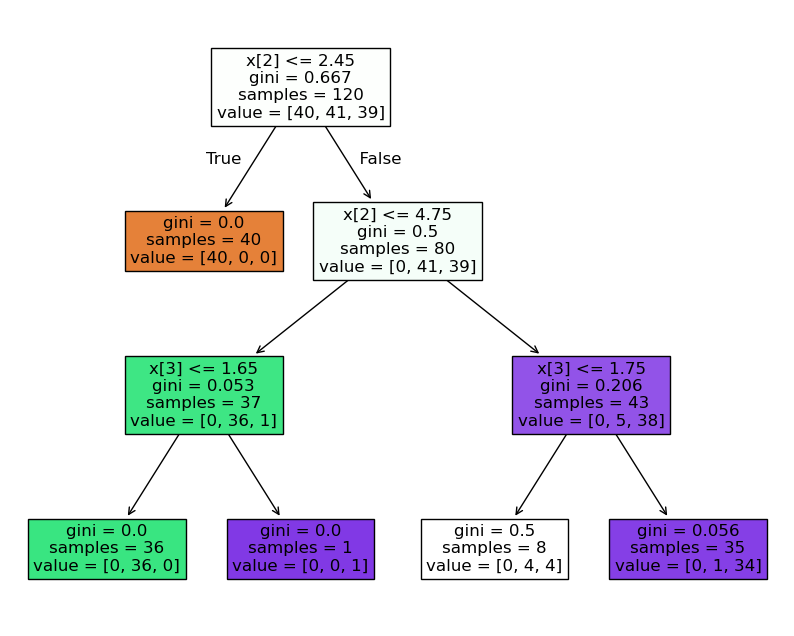

In [4]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We can skip the standarization step
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)

plt.figure(figsize=(10, 8))
plot_tree(decision_tree, fontsize=12, filled=True)

The plot tree function provides with an encoded decision tree, which is translated into an understandable tree plot. As we can see, the first decision, that the petal length (in cm) is less or equal than 2.45 (x[2] means the third variable, remember that python indexes start at 0) is able to separate all the 40 setosa samples from the other 41 versicolor and 39 virginica. Note how the gini impurity index is lower on the next nodes, since they are less discriminative that the nodes above. Sadly, we only three nodes we are not able to fully separate all the remaining versicolor and virginica flowers.

We can display the decision boundaries, however, since now we are working with 4 features, we will need to use another function than the one generated here. If you want more information on that, please see nthis scikit-learn documentation webpage (https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html).

What we can plot is the confusion matrix and the metrics for our three classes classificator with the test dataset.

In [16]:
# We check the metricSs in this case
compute_evaluation_metrics(decision_tree, X_test, y_test, iris['target_names'])

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:


Interestingly, although for the training set our classifier is unable to classify all samples correctly, it does a perfect classification for the test dataset.

Okay, now instead of an individual decision tree we will train a random forest classifier with the same dataset. As a non-parametric method, we do not need to adjust the hyperparameters as much as when dealing with **SVM**. In fact, **scikit-learn** already optimizes the size **n** (chosen to be equal to the number of samples in the original training set) of the bootstrap sample and the number of features **d** (**scikit-learn** chooses $d=\sqrt{m}$ where $m$ is the number of features at the training set) that is randomly chosen for each iteration.

Through **n** we control the bias-variance tradeoff of the random forest:
- For larger values for **n** we decrease the randomness and thus the forest is more likely to overfit whereas we can reduce the degree of overitting by choosing smaller **n** values at the expense of the model performance.
- The optimal for **d** is just a smaller value than the number of features.

In [17]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=1000, random_state=42)
random_forest.fit(X_train, y_train)

# We check the metrics in this case
compute_evaluation_metrics(decision_tree, X_test, y_test, iris['target_names'])

/home/miguel/miniconda3/envs/MScOmicsVic/lib/python3.12/site-packages/sklearn/base.py:1336: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:


In the same way as the decision tree, the random forest that we trained is able to properly separate the three flower classes.

One of the interesting features of the random forest classifier is that, as an **embedded method** (remember the **feature selection** theory), by building random decision trees from the data the ensemble model is able to better grasp the relative importance of each of the features in the classification of the different classes.

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
feature importances: [0.1051965  0.03242519 0.43951174 0.42286656]


Text(0, 0.5, 'Relative feature importance')

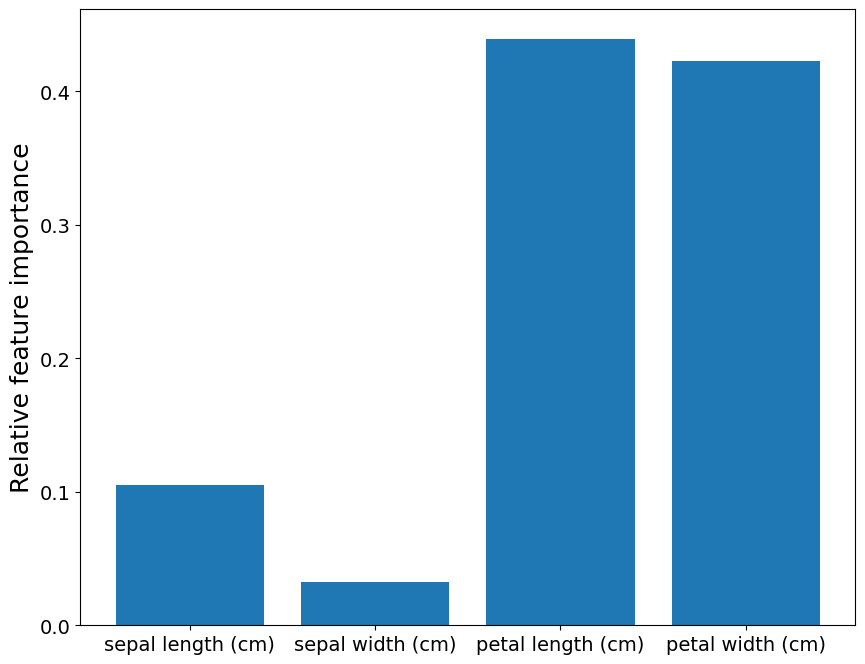

In [18]:
print(iris['feature_names'])
print('feature importances:', random_forest.feature_importances_)
plt.figure(figsize=(10,8))
plt.bar(iris['feature_names'], random_forest.feature_importances_)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Relative feature importance', fontsize=18)

We can see that to classify flowers the features with the highest relative importance is the petal lengh and width (the two features of the peatals, rather than the information from the sepals).

### Ensemble Methods: XGBoost

While Logistic Regression and SVM are fundamental, **Gradient Boosting Machines (GBMs)** like **XGBoost** are currently the gold standard for tabular biological data classification due to their ability to handle non-linearities and missing data natively.

We have just explored Random Forests, which are an example of **Bagging** (Bootstrap Aggregating). In Bagging, we build many independent trees in parallel and average their results to reduce variance and overfitting.

**XGBoost** (Extreme Gradient Boosting) is also an ensemble method based on decision trees, but it follows a completely different philosophy called **Boosting**. Unlike Random Forest, where trees are built independently, in Boosting, the trees are built **sequentially**. Each new tree is designed specifically to correct the mistakes made by the previous trees.

While a Random Forest creates a "democracy" of trees that vote, XGBoost creates a "team" of trees where each member improves upon the work of the team so far. It is called "Gradient" boosting because it uses a gradient descent algorithm to minimize the loss function (the errors) when adding new models.

The algorithm behind **XGBoost** involves an iterative process. It starts with a naive prediction and then calculates the errors (residuals). The next tree is trained to predict these residuals rather than the target class itself.

Therefore, the steps for an XGBoost classifier are:

1. **Initial Prediction:** Start with a base prediction (e.g., the probability of 0.5 for binary classification).
2. **Calculate Residuals:** Determine the difference between the predicted values and the actual values (the error).
3. **Train Shallow Tree:** Build a decision tree (often called a "weak learner") specifically to predict these residuals.
4. **Update Model:** Add this new tree to the ensemble, scaling its contribution by a **learning rate** (to prevent overfitting).
5. **Repeat:** Repeat steps 2-4 until a specified number of trees are built or the error stops improving.

---

The **learning rule** of XGBoost is more mathematically complex than Random Forest. It optimizes a specific **Objective Function** that consists of two parts: a **Loss Function** (how well the model fits the data) and a **Regularization Term** (to penalize complex models and prevent overfitting).

This regularization term  is what makes XGBoost "Extreme." It controls the complexity of the trees (by penalizing the number of leaves and the magnitude of leaf weights), making XGBoost uniquely robust against overfitting compared to standard Gradient Boosting machines.

---

**Advantages:**

* **High Performance:** XGBoost is famous for winning machine learning competitions (Kaggle) due to its speed and accuracy.
* **Regularization:** Includes L1 and L2 regularization to control overfitting.
* **Handling Missing Values:** It has a built-in routine to handle missing data automatically.
* **Parallel Processing:** Unlike standard boosting, XGBoost can parallelize the tree construction process, making it very fast.

**Disadvantages:**

* **Hyperparameter Sensitivity:** Requires careful tuning of many parameters (learning rate, depth, regularization, etc.).
* **Black Box:** Like Random Forest, it is difficult to interpret the specific path of logic for a single prediction.
* **Outliers:** Because it tries to fix errors, it can sometimes be sensitive to outliers in the data.

---

For the practical example, we will continue using the **Iris dataset** from `scikit-learn` to maintain consistency.


Just like with Random Forests, **XGBoost is a non-parametric method that does not strictly require feature scaling** (standardization), as it is based on tree splits. However, we do need to be careful with label encoding if our target variables were strings (here they are integers, so we are safe).

We will now train the XGBoost model. Unlike Random Forest where we usually let trees grow deep, in XGBoost we often use "shallow" trees (controlled by `max_depth`) but use many of them.

In [20]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=3, 
    random_state=42, 
    use_label_encoder=False, 
    eval_metric='mlogloss'
)

xgb_model.fit(X_train, y_train.values.ravel())

compute_evaluation_metrics(xgb_model, X_test, y_test, iris['target_names'])

/home/miguel/miniconda3/envs/MScOmicsVic/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning:

[18:56:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1767713912275/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.




Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:


You will likely see that XGBoost achieves a very high accuracy, similar to the Random Forest, but often with better generalization on larger, more complex datasets.

Just like Random Forest, XGBoost provides **feature importance**. However, while Random Forest calculates this based on the decrease in impurity (Gini), XGBoost calculates it based on the "gain" (improvement in accuracy) that each feature brings to the branches it is used in.

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
feature importances: [0.02091425 0.03946824 0.66991746 0.26970008]


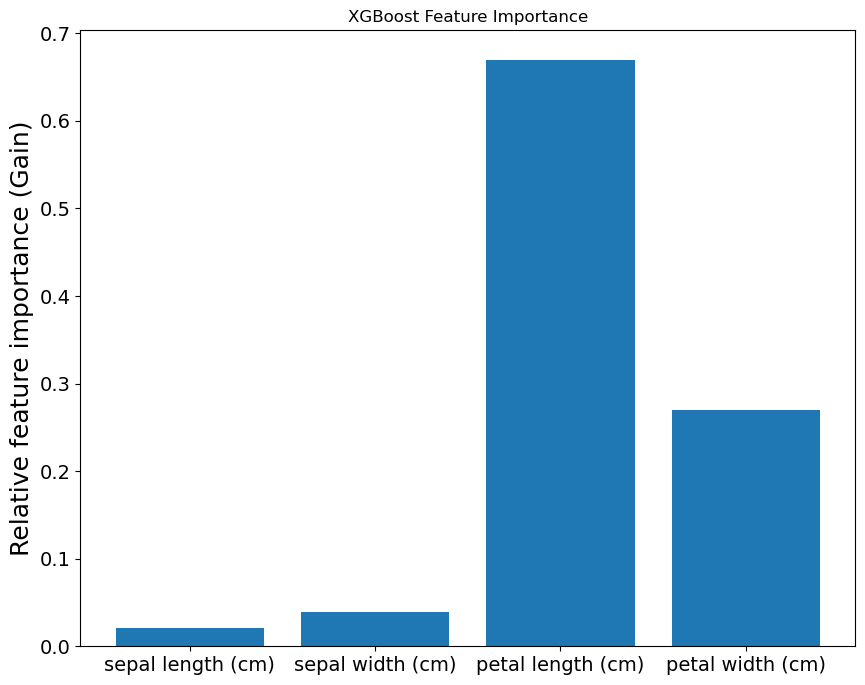

In [21]:
print('feature names:', iris['feature_names'])
print('feature importances:', xgb_model.feature_importances_)

plt.figure(figsize=(10,8))
plt.bar(iris['feature_names'], xgb_model.feature_importances_)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Relative feature importance (Gain)', fontsize=18)
plt.title('XGBoost Feature Importance')
plt.show()

Compared to random forest, which gives a similar importance to the petal length and width, XGBoost tends to be more aggressive in selecting the most critical features that reduce the error, often resulting in a clearer distinction of which variables are the true "signals" in the noise.